In [2]:

from SRC.utils import constants as CN
from SRC.utils.logger import APP_Logger
from SRC.utils.common_utils import get_null_percent , sep_column_dtypes , reduce_memory_usage

In [115]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import shutil
import pickle
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import datetime
from warnings import filterwarnings
from pandas_profiling import ProfileReport
import requests 
import cufflinks as cf
#***************************************************************************************************#
# from sklearn.preprocessing import MinMaxScaler , LabelEncoder , StandardScaler , OneHotEncoder
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import train_test_split
# #***************************************************************************************************#
# from sklearn.metrics import mean_squared_error , mean_absolute_error , explained_variance_score , r2_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LinearRegression ,ElasticNet , ElasticNetCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# import xgboost as xgb
# import optuna
#***************************************************************************************************#

sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
pd.options.display.max_columns = 200
%matplotlib inline
filterwarnings('ignore')
cf.go_offline()
cf.set_config_file(sharing='public',theme='pearl',offline=True)


In [5]:
os.listdir(CN.DOWNLOAD_DIR)

['Datasets_Healthy_Older_People']

In [26]:
RAW_DATA =[]

In [27]:
for root, dirs, files in os.walk(CN.DOWNLOAD_DIR):
    for file in files:
            OS_FILE_PATH = os.path.join(root, file)

            RAW_DATA.append(OS_FILE_PATH)

In [28]:
CN.DOWNLOAD_DIR

'/home/pk/Desktop/Eda/Elder ppl/Artifacts/Downloads'

In [ ]:
RAW_DATA

In [47]:
df = pd.read_csv(RAW_DATA[0] , header = None , names= ['Time', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Id', 'RSSI', 'Phase', 'Freq', 'Label'])

In [52]:
filename= RAW_DATA[0].split('/')[-1]
df['Filename'] = filename
df['gender'] = filename[-1]

In [59]:
# Column 1: Time in seconds starting from 0 rounded to the closest 0.025s
# Column 2: Acceleration reading in G for frontal axis
# Column 3: Acceleration reading in G for vertical axis
# Column 4: Acceleration reading in G for lateral axis
# Column 5: Id of antenna reading sensor
# Column 6: Received signal strength indicator (RSSI) 
# Column 7: Phase
# Column 8: Frequency
# Column 9: Label of activity, 1: sit on bed, 2: sit on chair, 3: lying, 4: ambulating


columns = ['Time', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Id', 'RSSI', 'Phase', 'Freq', 'Label' , 'Filename' , 'gender' , 'Room']

In [60]:
df.head()

,Time,Acc_X,Acc_Y,Acc_Z,Id,RSSI,Phase,Freq,Label,Filename,gender
0,0.00,0.060972,0.99674,-0.161920,3,-59.5,4.76150,924.25,4,d2p26F,F
1,0.25,0.060972,0.99674,-0.161920,3,-60.0,0.93573,924.75,4,d2p26F,F
2,1.50,-0.021106,0.82449,-0.082102,3,-65.5,4.11260,922.25,4,d2p26F,F
3,3.50,0.201680,0.98526,-0.082102,2,-64.0,5.68340,921.25,1,d2p26F,F
4,3.75,0.201680,0.98526,-0.082102,3,-59.0,1.67970,920.75,1,d2p26F,F


In [85]:
result = pd.DataFrame(columns =columns )

for root, dirs, files in os.walk(CN.DOWNLOAD_DIR):
    for file in files:
            OS_FILE_PATH = os.path.join(root, file)
            # print(OS_FILE_PATH)
            if not OS_FILE_PATH.endswith('.txt'):
                df = pd.read_csv(OS_FILE_PATH , header = None , names= ['Time', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Id', 'RSSI', 'Phase', 'Freq', 'Label'])
                df['filename'] = file
                df['gender'] = file[-1]
                df['Room'] = OS_FILE_PATH.split('/')[-2]
                # display(df.head(2))
                result = pd.concat([result,df])
            else:
                pass


In [86]:
result.shape

(75128, 13)

In [90]:
result.to_csv(CN.RAW_FILE_NAME)

In [92]:
result.filename.unique()

array(['d2p26F', 'd2p27F', 'd2p05F', 'd2p25F', 'd2p06F', 'd2p19M',
       'd2p04F', 'd2p24F', 'd2p01F', 'd2p08F', 'd2p16F', 'd2p12F',
       'd2p13F', 'd2p17F', 'd2p18M', 'd2p11F', 'd2p22M', 'd2p15F',
       'd2p14F', 'd2p02F', 'd2p10F', 'd2p03F', 'd2p07F', 'd2p09F',
       'd2p20M', 'd2p21M', 'd2p23F', 'd1p09F', 'd1p49F', 'd1p51F',
       'd1p39M', 'd1p57F', 'd1p14F', 'd1p15F', 'd1p07M', 'd1p23F',
       'd1p16F', 'd1p44M', 'd1p08F', 'd1p34F', 'd1p20F', 'd1p25F',
       'd1p29F', 'd1p56F', 'd1p37M', 'd1p48M', 'd1p32F', 'd1p31F',
       'd1p17F', 'd1p04M', 'd1p03M', 'd1p28F', 'd1p26F', 'd1p18F',
       'd1p13F', 'd1p53F', 'd1p46M', 'd1p36M', 'd1p33F', 'd1p47M',
       'd1p12F', 'd1p50F', 'd1p41M', 'd1p24F', 'd1p58F', 'd1p06M',
       'd1p19F', 'd1p52F', 'd1p10F', 'd1p59F', 'd1p60F', 'd1p27F',
       'd1p02M', 'd1p05M', 'd1p42M', 'd1p01M', 'd1p30F', 'd1p22F',
       'd1p40M', 'd1p35F', 'd1p38M', 'd1p21F', 'd1p54F', 'd1p11F',
       'd1p43M', 'd1p45M', 'd1p55F'], dtype=object)

In [96]:
df = pd.read_csv('Artifacts/Downloads/Datasets_Healthy_Older_People/S1_Dataset/d1p01M' , header = None , names= ['Time', 'Acc_X', 'Acc_Y', 'Acc_Z', 'Id', 'RSSI', 'Phase', 'Freq', 'Label'])

In [97]:
df.shape

(401, 9)

In [99]:
df.head(100)

,Time,Acc_X,Acc_Y,Acc_Z,Id,RSSI,Phase,Freq,Label
0,0.000,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1
1,0.500,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1
2,1.500,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1
3,1.750,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1
4,2.500,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1
...,...,...,...,...,...,...,...,...,...
95,50.000,0.94038,-0.18603,-0.161920,4,-66.5,5.3321,923.75,3
96,50.500,0.92865,-0.19751,-0.150520,4,-65.5,1.8623,921.25,3
97,50.750,0.92865,-0.19751,-0.150520,3,-50.5,6.0638,920.75,3
98,50.825,0.92865,-0.19751,-0.150520,4,-66.0,5.4272,920.75,3


In [101]:
df['Label_act'] = df['Label'].map({1: 'sit on bed', 2: 'sit on chair', 3: 'lying', 4: 'ambulating'})

In [103]:
df['Label_act'].value_counts()

lying           220
sit on bed      114
sit on chair     60
ambulating        7
Name: Label_act, dtype: int64

In [111]:
df[df['Label_act'] == 'sit on bed'].head(60)

,Time,Acc_X,Acc_Y,Acc_Z,Id,RSSI,Phase,Freq,Label,Label_act
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.42520,924.25,1,sit on bed
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.73690,921.75,1,sit on bed
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.03110,923.75,1,sit on bed
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.03710,921.25,1,sit on bed
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.89200,920.25,1,sit on bed
5,3.25,0.34238,0.96229,-0.059296,4,-56.5,1.25630,924.75,1,sit on bed
6,4.00,0.30721,0.99674,-0.070699,1,-63.5,3.87180,922.75,1,sit on bed
7,5.00,0.27203,0.99674,-0.093505,1,-64.0,2.49430,924.25,1,sit on bed
8,5.50,0.23685,1.03120,-0.127710,1,-64.5,2.00800,924.75,1,sit on bed
9,6.00,0.23685,1.03120,-0.127710,1,-66.0,1.19040,925.75,1,sit on bed


In [124]:
df.iloc[:54 , :8].iplot(kind= 'scatter', x='Time', y='Acc_X')

In [126]:
df.iloc[:54 , :8].iplot(kind= 'scatter', x='Time', y='Acc_Y')

In [129]:
df.groupby('Label_act').mean()

,Time,Acc_X,Acc_Y,Acc_Z,Id,RSSI,Phase,Freq,Label
Label_act,,,,,,,,,
ambulating,145.500000,0.352431,0.911431,-0.086989,1.428571,-56.642857,3.218496,922.750000,4.0
lying,136.454068,1.003751,-0.207010,-0.107862,3.100000,-55.863636,3.851561,922.963636,3.0
sit on bed,70.668246,0.360588,0.941940,-0.057595,2.000000,-60.850877,3.107642,922.850877,1.0
sit on chair,149.708833,0.892502,0.637699,-0.092745,2.000000,-56.608333,2.783079,923.291667,2.0


<AxesSubplot:xlabel='Label', ylabel='Acc_X'>

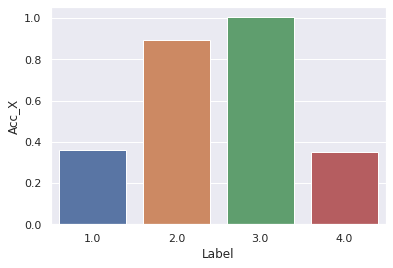

In [139]:
sns.barplot( data = df.groupby('Label_act').mean() , x = 'Label' , y = 'Acc_X')

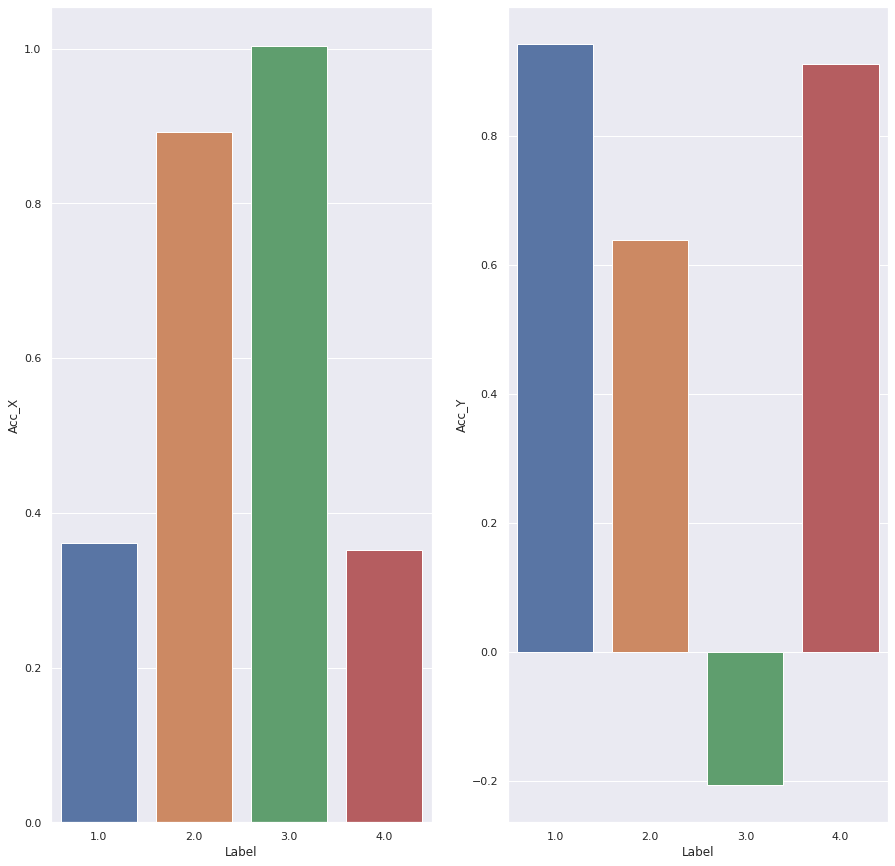

In [147]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(15,15))

sns.barplot( data = df.groupby('Label_act').mean() , x = 'Label' , y = 'Acc_X' , ax = ax[0])
sns.barplot( data = df.groupby('Label_act').mean() , x = 'Label' , y = 'Acc_Y' , ax = ax[1] )
sns.barplot( data = df.groupby('Label_act').mean() , x = 'Label' , y = 'Acc_Y' , ax = ax[1] )
plt.show()
